In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [2]:
df.shape

(11504798, 12)

In [3]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [4]:
numerical_df = df.select_dtypes(include=['number'])
# numerical_features = numerical_df.columns.tolist()

categorical_df = df.select_dtypes(include=['object'])
# categorical_df = categorical_df.columns.to_list()


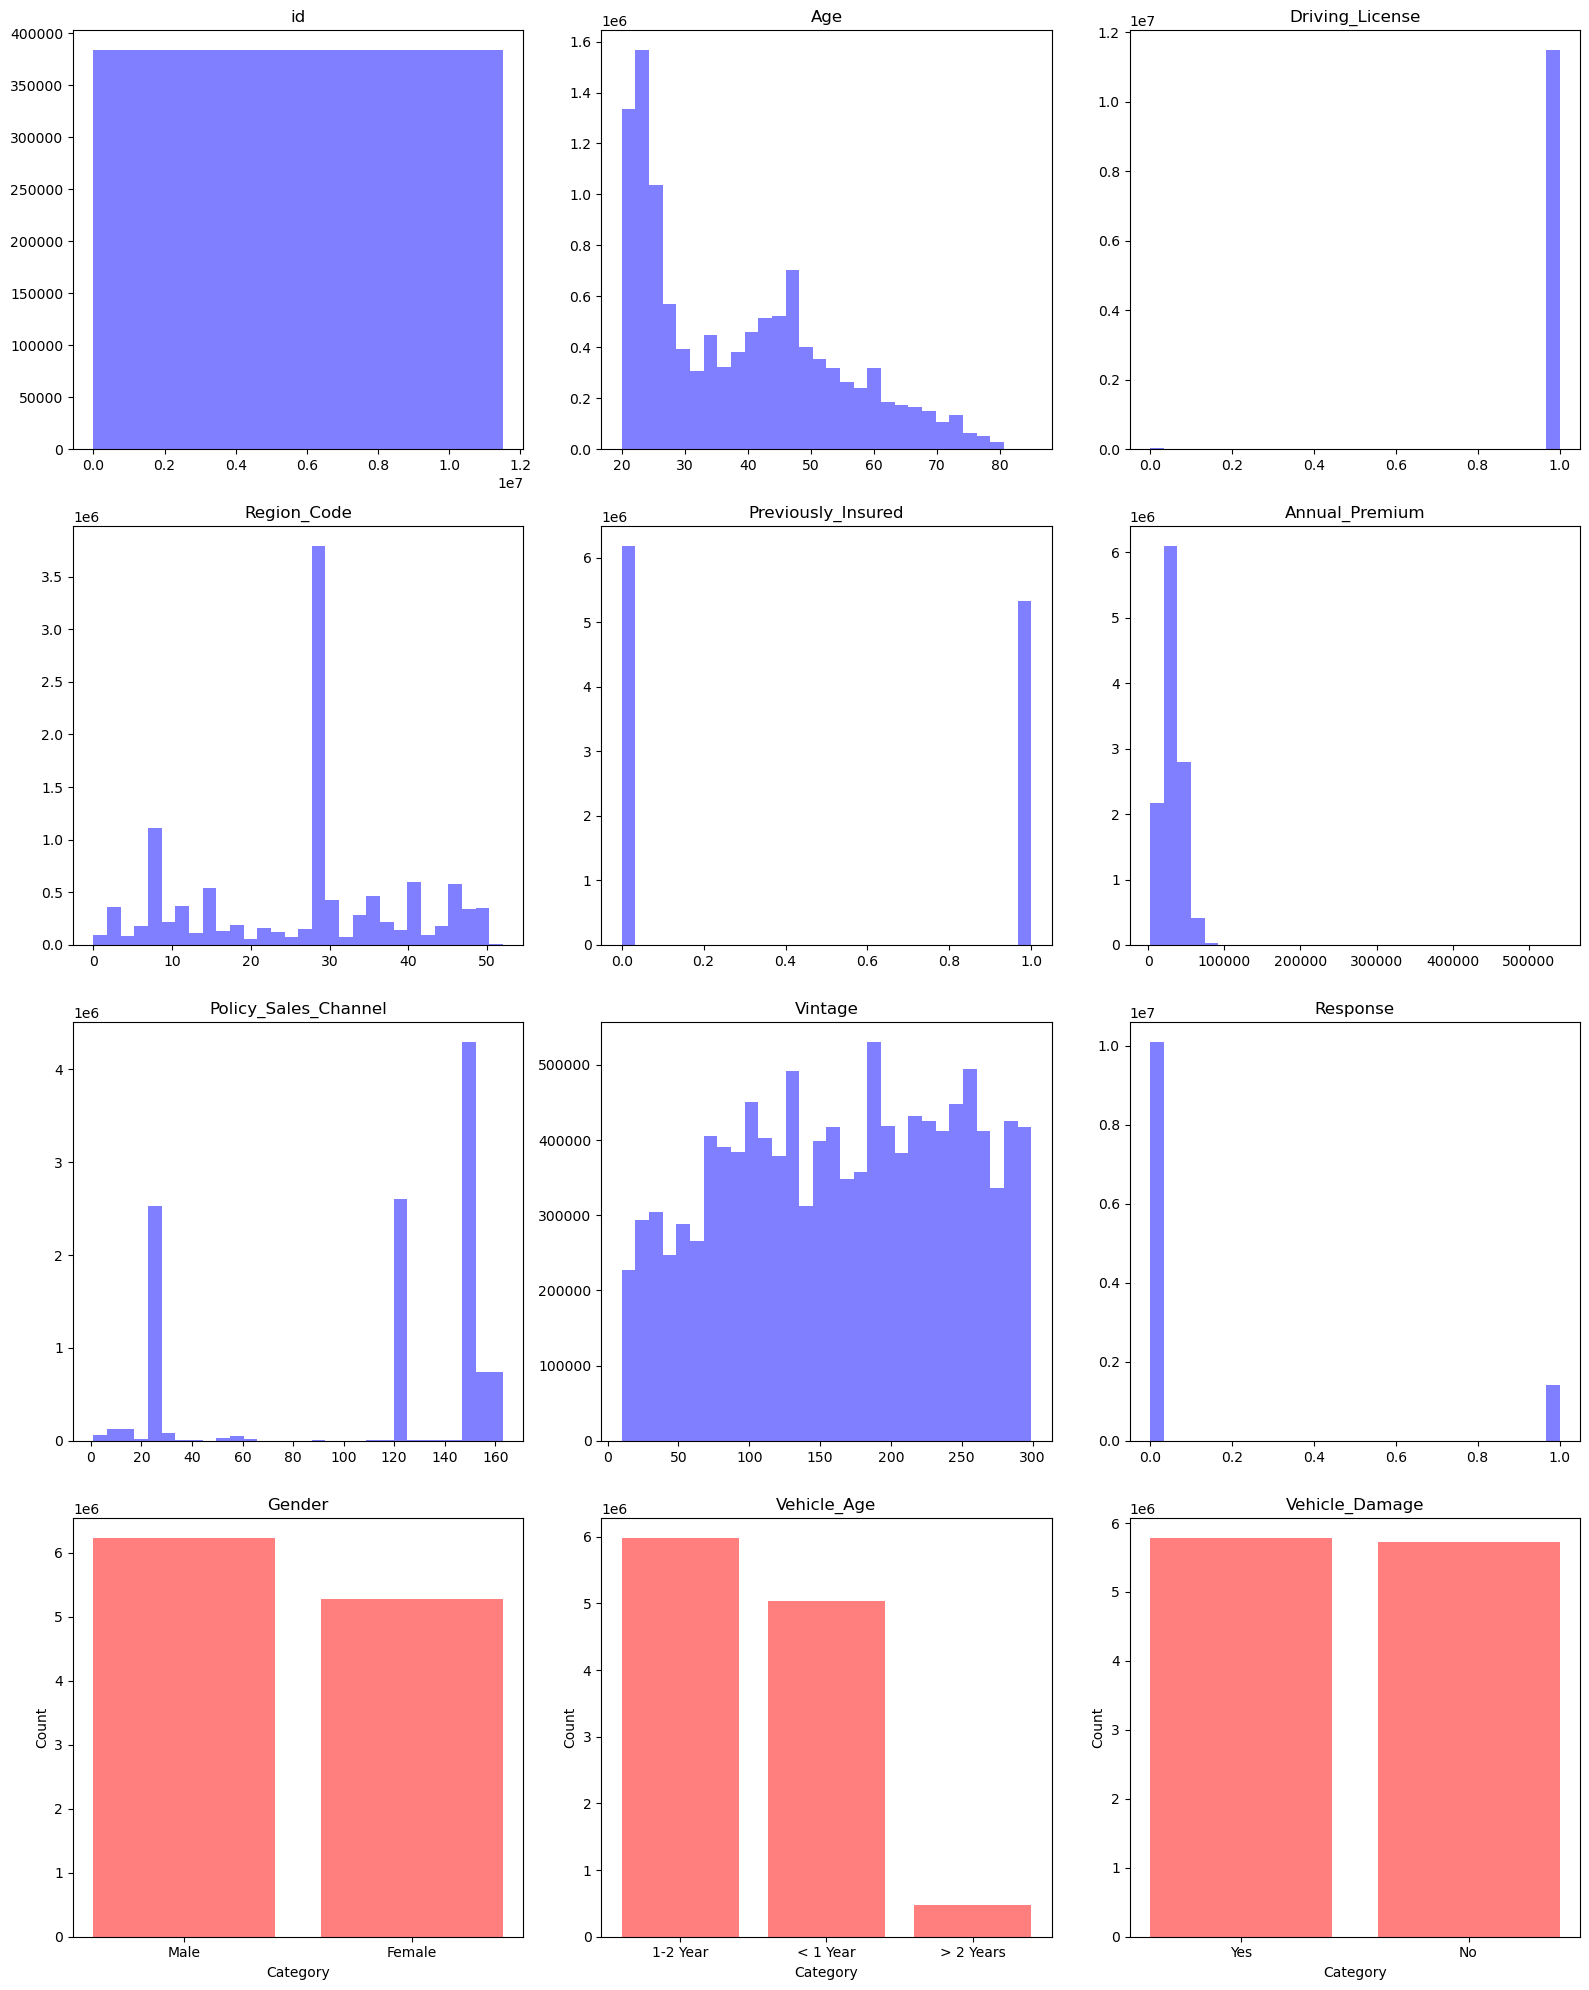

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(16, 20))
axs = axs.flatten()

index = 0

# Loop through each numerical column and plot a histogram
for num_ft in numerical_df.columns:
    ax = axs[index]
    ax.hist(numerical_df[num_ft], bins=30, alpha=0.5, color='blue')
    ax.set_title(num_ft)
    index += 1

# Loop through each categorical column and plot a bar chart of value counts
for cat_ft in categorical_df.columns:
    ax = axs[index]
    # Get the frequency counts for each category
    counts = categorical_df[cat_ft].value_counts()
    # Create a bar chart using the category names as labels
    ax.bar(counts.index.astype(str), counts.values, alpha=0.5, color='red')
    ax.set_title(cat_ft)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    index+=1

plt.tight_layout()
plt.show()

# Pearson Correlation #

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
# 2 categories columns
df['Gender'] = encoder.fit_transform(df[['Gender']])
df['Vehicle_Damage'] = encoder.fit_transform(df[['Vehicle_Damage']])

#3 categories columns
vehicle_age_encoded = encoder.fit_transform(df[['Vehicle_Age']])
encoded_cols = encoder.get_feature_names_out(['Vehicle_Age'])
vehicle_age_df = pd.DataFrame(vehicle_age_encoded, columns=encoded_cols)
vehicle_age_df.index = df.index
df = df.drop('Vehicle_Age', axis=1).join(vehicle_age_df)

In [7]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,0.0,21,1,35.0,0,0.0,65101.0,124.0,187,0,1.0,0.0,0.0
1,1,0.0,43,1,28.0,0,0.0,58911.0,26.0,288,1,0.0,0.0,1.0
2,2,1.0,25,1,14.0,1,1.0,38043.0,152.0,254,0,0.0,1.0,0.0
3,3,1.0,35,1,1.0,0,0.0,2630.0,156.0,76,0,1.0,0.0,0.0
4,4,1.0,36,1,15.0,1,1.0,31951.0,152.0,294,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,0.0,48,1,6.0,0,0.0,27412.0,26.0,218,0,1.0,0.0,0.0
11504794,11504794,1.0,26,1,36.0,0,0.0,29509.0,152.0,115,1,0.0,1.0,0.0
11504795,11504795,1.0,29,1,32.0,1,1.0,2630.0,152.0,189,0,0.0,1.0,0.0
11504796,11504796,1.0,51,1,28.0,0,0.0,48443.0,26.0,274,1,1.0,0.0,0.0


In [8]:
from scipy import stats

c_stats = []
p_values = []
for col1 in df.columns:
    for col2 in df.columns:
        res = stats.pearsonr(df[col1],df[col2])
        c_stats.append((col1,col2,res.statistic))
        p_values.append((col1,col2, res.pvalue))
print(f'c stats: {c_stats}')
print(f'p_values: {p_values}')

c stats: [('id', 'id', 1.0), ('id', 'Gender', 3.0724361915075016e-05), ('id', 'Age', -8.7996388900481e-05), ('id', 'Driving_License', -4.460082071582064e-05), ('id', 'Region_Code', 0.00014683830022931078), ('id', 'Previously_Insured', 0.00021655209577109557), ('id', 'Vehicle_Damage', 0.00018428182188880038), ('id', 'Annual_Premium', -0.00020534549343161074), ('id', 'Policy_Sales_Channel', 0.0005496035822266538), ('id', 'Vintage', -0.00018200121822191715), ('id', 'Response', 1.7539052406371234e-05), ('id', 'Vehicle_Age_1-2 Year', -0.00022224055557826277), ('id', 'Vehicle_Age_< 1 Year', 9.75072775985429e-05), ('id', 'Vehicle_Age_> 2 Years', 0.0003139510738068764), ('Gender', 'id', 3.0724361915075016e-05), ('Gender', 'Gender', 1.0), ('Gender', 'Age', -0.15766283770812747), ('Gender', 'Driving_License', 0.018701530563532593), ('Gender', 'Region_Code', 0.00010560304565216143), ('Gender', 'Previously_Insured', 0.08761408970846388), ('Gender', 'Vehicle_Damage', 0.09698867009593007), ('Gender'

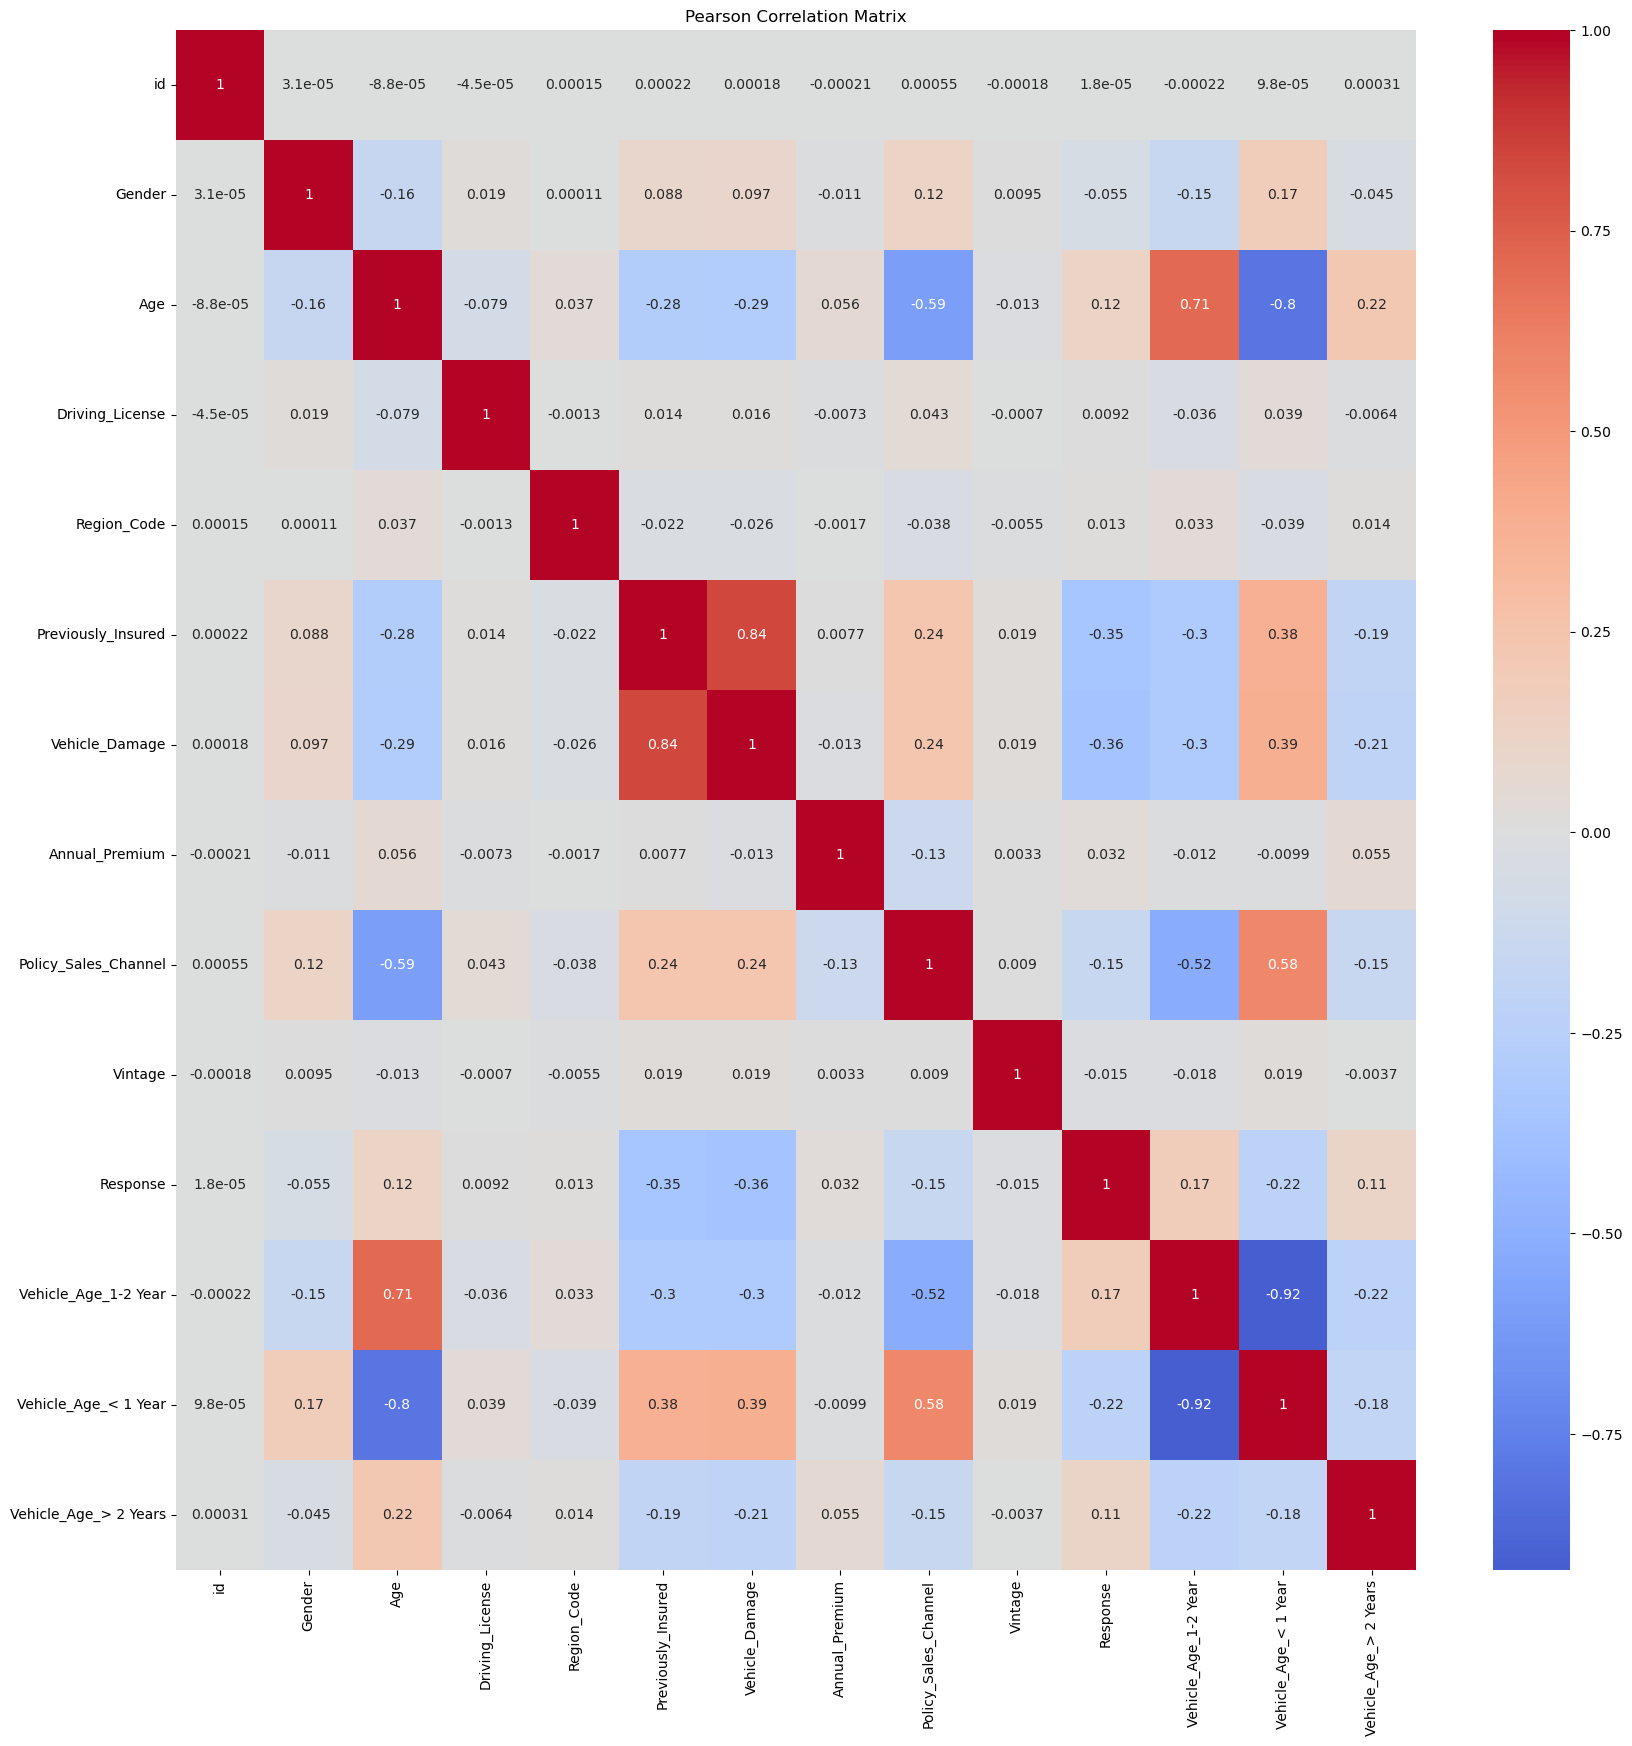

In [10]:
import seaborn as sns

# Calculate the Pearson correlation matrix
corr_matrix = df.corr(method='pearson')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Matrix")
plt.show()